In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sys import exit
from scipy import stats
import pvalues
import visualize_data

plt.close('all')

In [32]:
# specify parameters (genre = music genre, year_max = end point on plots, test_year = 'test year' to vizualize data set to check for e.g. normality)
genre = 'house'
year_max = '2016'
test_year = 2014

# load in data 
df = pd.read_pickle('data/'+genre+'_'+year_max)
df_features = pd.read_pickle('data/'+genre+'_features_'+year_max)

# normalize loudness (only column not normalized yet)
df_features['loudness_norm'] = (df_features['loudness'] - 60) / 120

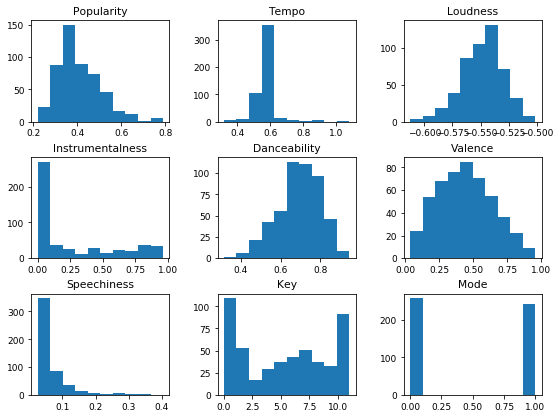

In [38]:
# First peek into the data: vizualize data for a given year
a = df[df['release_year'].astype(int) == test_year]
b = df_features[df['release_year'].astype(int) == test_year]
visualize_data.vis_data(a,b,genre)

plt.show()

In [34]:
# initiate array
res = []

# we want to plot the 25th and 75th percentile of the data
p1 = 25
p2 = 75

# parse objects
for i in range(1980,np.int_(year_max)+1):
    # limit each year to 100 songs, so that each bin has roughly same statistics
    a = df[df['release_year'].astype(int) == i][0:100]
    b = df_features[df['release_year'].astype(int) == i][0:100]
    
    if len(a) == 0:
        continue 
    
    # parse data. popularity is normalized to 0 - 1.
    popu = np.median(a['popularity']/100.)
    temp = np.median(b['tempo_norm'])
    loud = np.median(b['loudness_norm'])
    dance = np.median(b['danceability'])
    inst = np.median(b['instrumentalness'])
    val = np.median(b['valence'])
    
    popu_25 = np.percentile(a['popularity']/100.,p1)
    temp_25 = np.percentile(b['tempo_norm'],p1)
    loud_25 = np.percentile(b['loudness_norm'],p1)
    dance_25 = np.percentile(b['danceability'],p1)
    inst_25 = np.percentile(b['instrumentalness'],p1)
    val_25 = np.percentile(b['valence'],p1)
    
    popu_75 = np.percentile(a['popularity']/100.,p2)
    temp_75 = np.percentile(b['tempo_norm'],p2)
    loud_75 = np.percentile(b['loudness_norm'],p2)
    dance_75 = np.percentile(b['danceability'],p2)
    inst_75 = np.percentile(b['instrumentalness'],p2)
    val_75 = np.percentile(b['valence'],p2)
    
    res.append({'popu':popu, 'temp':temp, 'loud':loud, 'dance':dance, 'inst':inst, 'val':val, 'popu_25':popu_25, 'temp_25':temp_25, 'loud_25':loud_25, 'dance_25':dance_25, 'inst_25':inst_25, 'val_25':val_25,  'popu_75':popu_75, 'temp_75':temp_75, 'loud_75':loud_75, 'dance_75':dance_75, 'inst_75':inst_75, 'val_75':val_75})
        
# save to dataframe
result = pd.DataFrame(res)

# option to save 
#result.to_pickle('data/'+genre+'_stats')

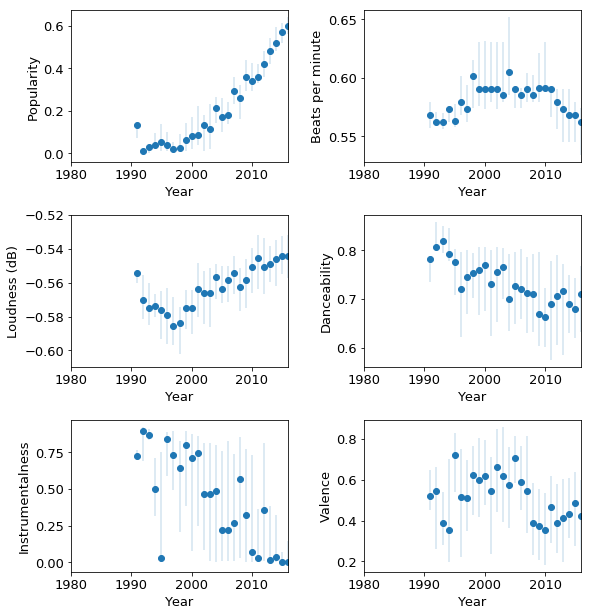

In [35]:
# now plot the results!    
plt.close('all')
xaxis = np.arange(np.int_(year_max)+1 - len(result), np.int_(year_max)+1,1)
        
fig = plt.figure(figsize=(10.5,12))
font = {'size':13}
plt.rc('font', **font)

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.875, top=0.85, wspace=0.35, hspace=0.35)

alpha = 0.2

plt.subplot(321)
plt.scatter(xaxis,result['popu'])
plt.errorbar(xaxis,result['popu'],yerr=(result['popu']-result['popu_25'],result['popu_75']-result['popu']),fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([1980,2016])
plt.ylabel('Popularity')

plt.subplot(322)
plt.scatter(xaxis,result['temp'])
plt.errorbar(xaxis,result['temp'],yerr=(result['temp']-result['temp_25'],result['temp_75']-result['temp']),fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.ylabel('Beats per minute')
plt.xlim([1980,2016])

plt.subplot(323)
plt.scatter(xaxis,result['loud'])
plt.errorbar(xaxis,result['loud'],yerr=(result['loud']-result['loud_25'],result['loud_75']-result['loud']),fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([1980,2016])
plt.ylabel('Loudness (dB)')

plt.subplot(324)
plt.scatter(xaxis,result['dance'])
plt.errorbar(xaxis,result['dance'],yerr=(result['dance']-result['dance_25'],result['dance_75']-result['dance']),fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([1980,2016])
plt.ylabel('Danceability')

plt.subplot(325)
plt.scatter(xaxis,result['inst'])
plt.errorbar(xaxis,result['inst'],yerr=(result['inst']-result['inst_25'],result['inst_75']-result['inst']),fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([1980,2016])
plt.ylabel('Instrumentalness')

plt.subplot(326)
plt.scatter(xaxis,result['val'])
plt.errorbar(xaxis,result['val'],yerr=(result['val']-result['val_25'],result['val_75']-result['val']),fmt='.',alpha=alpha)
plt.xlabel('Year')
plt.xlim([1980,2016])
plt.ylabel('Valence')

plt.show()
#plt.savefig('output/'+genre+'_evolution.pdf', dpi=150, bbox_inches='tight', pad_inches=0.2)

In [36]:
# has the music evolved significantly over the decades?

# get statistics for decades
df['release_year'] = df['release_year'].astype(int)
df_80s = df[(df['release_year'] >= 1980) & (df['release_year'] < 1990)]
df_90s = df[(df['release_year'] >= 1990) & (df['release_year'] < 2000)]
df_00s = df[(df['release_year'] >= 2000) & (df['release_year'] < 2010)]
df_10s = df[(df['release_year'] >= 2010) & (df['release_year'] < 2020)]

df_features_80s = df_features[(df['release_year'] >= 1980) & (df['release_year'] < 1990)]
df_features_90s = df_features[(df['release_year'] >= 1990) & (df['release_year'] < 2000)]
df_features_00s = df_features[(df['release_year'] >= 2000) & (df['release_year'] < 2010)]
df_features_10s = df_features[(df['release_year'] >= 2010) & (df['release_year'] < 2020)]

# table prints Student's T-test p-values for Tempo, Loudness, Danceability, Valence (which satisfy normality; see earlier plot) comparing distributions of all 1990's and 2010's tracks (and 2000's versus 2010's tracks).
# for all music genres we find p << 0.05, except for the danceability of electro.
p9010 = pd.Series(pvalues.calc_pvalues(df_features_90s,df_features_10s),index=['Tempo', 'Loudness', 'Danceability', 'Valence'],name='1990s vs 2010s')
p0010 = pd.Series(pvalues.calc_pvalues(df_features_00s,df_features_10s),index=['Tempo', 'Loudness', 'Danceability', 'Valence'],name='2000s vs 2010s')

pvalues = pd.concat([p9010, p0010], axis=1)
pvalues

,1990s vs 2010s,2000s vs 2010s
Tempo,7.395021e-05,1.344878e-51
Loudness,9.496981e-117,8.148901e-234
Danceability,1.051524e-09,5.789747e-20
Valence,1.546506e-26,1.144226e-30
